# Week 3 Assignment: Census Data Exploration

Examining Los Angeles Chinatown - Income

Author: Brian Kohaya

Description: This notebook will look at income in Chinatown, Los Angeles and the immediate surrounding areas (Echo Park, Lincoln Heights, and Elysian Park)

In [4]:
import pandas as pd
import geopandas as gpd
import numpy as np

## Preliminary in spection of the data to check the size of the data

In [7]:
income.shape

(2346, 72)

In [6]:
income = pd.read_csv('Week 3/CTI.csv')

In [8]:
income.head()

,Geo_FIPS,Geo_GEOID,Geo_NAME,Geo_QName,Geo_STUSAB,Geo_SUMLEV,Geo_GEOCOMP,Geo_FILEID,Geo_LOGRECNO,Geo_US,...,SE_A14001_008,SE_A14001_009,SE_A14001_010,SE_A14001_011,SE_A14001_012,SE_A14001_013,SE_A14001_014,SE_A14001_015,SE_A14001_016,SE_A14001_017
0,6037101110,14000US06037101110,Census Tract 1011.10,"Census Tract 1011.10, Los Angeles County, Cali...",ca,140,0,ACSSF,3870,NaN,...,54,78,88,64,126,277,91,93,109,44
1,6037101122,14000US06037101122,Census Tract 1011.22,"Census Tract 1011.22, Los Angeles County, Cali...",ca,140,0,ACSSF,3871,NaN,...,7,40,23,62,186,232,114,105,133,192
2,6037101210,14000US06037101210,Census Tract 1012.10,"Census Tract 1012.10, Los Angeles County, Cali...",ca,140,0,ACSSF,3872,NaN,...,61,95,220,128,147,225,96,67,14,71
3,6037101220,14000US06037101220,Census Tract 1012.20,"Census Tract 1012.20, Los Angeles County, Cali...",ca,140,0,ACSSF,3873,NaN,...,60,118,123,53,75,88,110,45,43,39
4,6037101300,14000US06037101300,Census Tract 1013,"Census Tract 1013, Los Angeles County, California",ca,140,0,ACSSF,3874,NaN,...,18,123,49,87,80,200,146,107,195,184


In [10]:
income.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2346 entries, 0 to 2345
Data columns (total 72 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Geo_FIPS       2346 non-null   int64  
 1   Geo_GEOID      2346 non-null   object 
 2   Geo_NAME       2346 non-null   object 
 3   Geo_QName      2346 non-null   object 
 4   Geo_STUSAB     2346 non-null   object 
 5   Geo_SUMLEV     2346 non-null   int64  
 6   Geo_GEOCOMP    2346 non-null   int64  
 7   Geo_FILEID     2346 non-null   object 
 8   Geo_LOGRECNO   2346 non-null   int64  
 9   Geo_US         0 non-null      float64
 10  Geo_REGION     0 non-null      float64
 11  Geo_DIVISION   0 non-null      float64
 12  Geo_STATECE    0 non-null      float64
 13  Geo_STATE      2346 non-null   int64  
 14  Geo_COUNTY     2346 non-null   int64  
 15  Geo_COUSUB     0 non-null      float64
 16  Geo_PLACE      0 non-null      float64
 17  Geo_PLACESE    0 non-null      float64
 18  Geo_TRAC

## Fix Leading Zero Issue

In [12]:
income = pd.read_csv('Week 3/CTI.csv',
                     dtype =
                     {
                         'Geo_FIPS':str,
                         'Geo_STATE':str,
                         'Geo_COUNTY': str
                     }
                    )

In [13]:
income.head()

,Geo_FIPS,Geo_GEOID,Geo_NAME,Geo_QName,Geo_STUSAB,Geo_SUMLEV,Geo_GEOCOMP,Geo_FILEID,Geo_LOGRECNO,Geo_US,...,SE_A14001_008,SE_A14001_009,SE_A14001_010,SE_A14001_011,SE_A14001_012,SE_A14001_013,SE_A14001_014,SE_A14001_015,SE_A14001_016,SE_A14001_017
0,06037101110,14000US06037101110,Census Tract 1011.10,"Census Tract 1011.10, Los Angeles County, Cali...",ca,140,0,ACSSF,3870,NaN,...,54,78,88,64,126,277,91,93,109,44
1,06037101122,14000US06037101122,Census Tract 1011.22,"Census Tract 1011.22, Los Angeles County, Cali...",ca,140,0,ACSSF,3871,NaN,...,7,40,23,62,186,232,114,105,133,192
2,06037101210,14000US06037101210,Census Tract 1012.10,"Census Tract 1012.10, Los Angeles County, Cali...",ca,140,0,ACSSF,3872,NaN,...,61,95,220,128,147,225,96,67,14,71
3,06037101220,14000US06037101220,Census Tract 1012.20,"Census Tract 1012.20, Los Angeles County, Cali...",ca,140,0,ACSSF,3873,NaN,...,60,118,123,53,75,88,110,45,43,39
4,06037101300,14000US06037101300,Census Tract 1013,"Census Tract 1013, Los Angeles County, California",ca,140,0,ACSSF,3874,NaN,...,18,123,49,87,80,200,146,107,195,184


In [16]:
income.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2346 entries, 0 to 2345
Data columns (total 72 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Geo_FIPS       2346 non-null   object 
 1   Geo_GEOID      2346 non-null   object 
 2   Geo_NAME       2346 non-null   object 
 3   Geo_QName      2346 non-null   object 
 4   Geo_STUSAB     2346 non-null   object 
 5   Geo_SUMLEV     2346 non-null   int64  
 6   Geo_GEOCOMP    2346 non-null   int64  
 7   Geo_FILEID     2346 non-null   object 
 8   Geo_LOGRECNO   2346 non-null   int64  
 9   Geo_US         0 non-null      float64
 10  Geo_REGION     0 non-null      float64
 11  Geo_DIVISION   0 non-null      float64
 12  Geo_STATECE    0 non-null      float64
 13  Geo_STATE      2346 non-null   object 
 14  Geo_COUNTY     2346 non-null   object 
 15  Geo_COUSUB     0 non-null      float64
 16  Geo_PLACE      0 non-null      float64
 17  Geo_PLACESE    0 non-null      float64
 18  Geo_TRAC

## Drop/Delete Null columns

In [19]:
income.columns[income.isna().all()].tolist()

['Geo_US',
 'Geo_REGION',
 'Geo_DIVISION',
 'Geo_STATECE',
 'Geo_COUSUB',
 'Geo_PLACE',
 'Geo_PLACESE',
 'Geo_BLKGRP',
 'Geo_CONCIT',
 'Geo_AIANHH',
 'Geo_AIANHHFP',
 'Geo_AIHHTLI',
 'Geo_AITSCE',
 'Geo_AITS',
 'Geo_ANRC',
 'Geo_CBSA',
 'Geo_CSA',
 'Geo_METDIV',
 'Geo_MACC',
 'Geo_MEMI',
 'Geo_NECTA',
 'Geo_CNECTA',
 'Geo_NECTADIV',
 'Geo_UA',
 'Geo_UACP',
 'Geo_CDCURR',
 'Geo_SLDU',
 'Geo_SLDL',
 'Geo_VTD',
 'Geo_ZCTA3',
 'Geo_ZCTA5',
 'Geo_SUBMCD',
 'Geo_SDELM',
 'Geo_SDSEC',
 'Geo_SDUNI',
 'Geo_UR',
 'Geo_PCI',
 'Geo_TAZ',
 'Geo_UGA',
 'Geo_BTTR',
 'Geo_BTBG',
 'Geo_PUMA5',
 'Geo_PUMA1']

In [21]:
income = income.dropna(axis=1,how="all")

In [22]:
income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2346 entries, 0 to 2345
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Geo_FIPS       2346 non-null   object
 1   Geo_GEOID      2346 non-null   object
 2   Geo_NAME       2346 non-null   object
 3   Geo_QName      2346 non-null   object
 4   Geo_STUSAB     2346 non-null   object
 5   Geo_SUMLEV     2346 non-null   int64 
 6   Geo_GEOCOMP    2346 non-null   int64 
 7   Geo_FILEID     2346 non-null   object
 8   Geo_LOGRECNO   2346 non-null   int64 
 9   Geo_STATE      2346 non-null   object
 10  Geo_COUNTY     2346 non-null   object
 11  Geo_TRACT      2346 non-null   int64 
 12  SE_A14001_001  2346 non-null   int64 
 13  SE_A14001_002  2346 non-null   int64 
 14  SE_A14001_003  2346 non-null   int64 
 15  SE_A14001_004  2346 non-null   int64 
 16  SE_A14001_005  2346 non-null   int64 
 17  SE_A14001_006  2346 non-null   int64 
 18  SE_A14001_007  2346 non-null

In [23]:
income.head()

,Geo_FIPS,Geo_GEOID,Geo_NAME,Geo_QName,Geo_STUSAB,Geo_SUMLEV,Geo_GEOCOMP,Geo_FILEID,Geo_LOGRECNO,Geo_STATE,...,SE_A14001_008,SE_A14001_009,SE_A14001_010,SE_A14001_011,SE_A14001_012,SE_A14001_013,SE_A14001_014,SE_A14001_015,SE_A14001_016,SE_A14001_017
0,06037101110,14000US06037101110,Census Tract 1011.10,"Census Tract 1011.10, Los Angeles County, Cali...",ca,140,0,ACSSF,3870,06,...,54,78,88,64,126,277,91,93,109,44
1,06037101122,14000US06037101122,Census Tract 1011.22,"Census Tract 1011.22, Los Angeles County, Cali...",ca,140,0,ACSSF,3871,06,...,7,40,23,62,186,232,114,105,133,192
2,06037101210,14000US06037101210,Census Tract 1012.10,"Census Tract 1012.10, Los Angeles County, Cali...",ca,140,0,ACSSF,3872,06,...,61,95,220,128,147,225,96,67,14,71
3,06037101220,14000US06037101220,Census Tract 1012.20,"Census Tract 1012.20, Los Angeles County, Cali...",ca,140,0,ACSSF,3873,06,...,60,118,123,53,75,88,110,45,43,39
4,06037101300,14000US06037101300,Census Tract 1013,"Census Tract 1013, Los Angeles County, California",ca,140,0,ACSSF,3874,06,...,18,123,49,87,80,200,146,107,195,184


### Cool now the data is more manageable

## Defining columns to Keep

In [29]:
columns_to_keep = [ 'Geo_FIPS',
    'SE_A14001_001',
            'SE_A14001_002',    
            'SE_A14001_003',      
            'SE_A14001_004',   
            'SE_A14001_005' ,  
            'SE_A14001_006',
            'SE_A14001_007' ,  
            'SE_A14001_008',    
            'SE_A14001_009', 
            'SE_A14001_010',  
            'SE_A14001_011',
            'SE_A14001_012',  
            'SE_A14001_013',
            'SE_A14001_014',
            'SE_A14001_015' ,  
            'SE_A14001_016',
            'SE_A14001_017']

In [30]:
income2 = income[columns_to_keep]

## Renameing Columns

In [32]:
columns = list(income2)
columns

['Geo_FIPS',
 'SE_A14001_001',
 'SE_A14001_002',
 'SE_A14001_003',
 'SE_A14001_004',
 'SE_A14001_005',
 'SE_A14001_006',
 'SE_A14001_007',
 'SE_A14001_008',
 'SE_A14001_009',
 'SE_A14001_010',
 'SE_A14001_011',
 'SE_A14001_012',
 'SE_A14001_013',
 'SE_A14001_014',
 'SE_A14001_015',
 'SE_A14001_016',
 'SE_A14001_017']

In [43]:
income2.columns = ['FIPS',
'Households',  
'Less than $10,000',
'$10,000 to $14,999',
'$15,000 to $19,999',
'$20,000 to $24,999',
'$25,000 to $29,999',
'$30,000 to $34,999',
'$35,000 to $39,999',
'$40,000 to $44,999',
'$45,000 to $49,999',
'$50,000 to $59,999',
'$60,000 to $74,999',
'$75,000 to $99,999',
'$100,000 to $124,999',
'$125,000 to $149,999',
'$150,000 to $199,999',
'$200,000 or More']

In [44]:
income2.sample(5)

,FIPS,Households,"Less than $10,000","$10,000 to $14,999","$15,000 to $19,999","$20,000 to $24,999","$25,000 to $29,999","$30,000 to $34,999","$35,000 to $39,999","$40,000 to $44,999","$45,000 to $49,999","$50,000 to $59,999","$60,000 to $74,999","$75,000 to $99,999","$100,000 to $124,999","$125,000 to $149,999","$150,000 to $199,999","$200,000 or More"
2062,06037650501,1041,0,0,24,32,24,22,19,43,23,88,98,95,182,75,161,155
1001,06037301203,1887,81,136,110,43,98,96,45,52,57,100,243,241,181,164,57,183
758,06037235202,1954,257,283,121,129,132,124,69,64,67,178,139,137,137,26,58,33
2329,06037980015,276,3,22,22,0,0,34,16,0,17,34,32,71,5,11,2,7
1887,06037574400,1879,55,25,18,70,33,82,37,60,44,110,106,269,173,230,321,246


### This one took a while to figure out the proper formatting but another step complete! Sorry about the weird font.

In [46]:
income2['Households'].head()

0    1596
1    1256
2    2321
3    1294
4    1435
Name: Households, dtype: int64

In [50]:
# What is the mean?
income2['Households'].mean()

1409.2536231884058

In [48]:
# What is the median?
income2['Households'].median()

1331.5

In [49]:
# Get some stats
income2['Households'].describe()

count    2346.000000
mean     1409.253623
std       611.413435
min         0.000000
25%      1012.000000
50%      1331.500000
75%      1718.500000
max      5477.000000
Name: Households, dtype: float64

<AxesSubplot: ylabel='Frequency'>

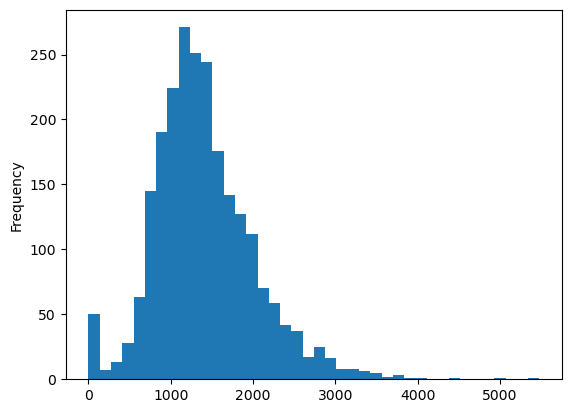

In [53]:
income2['Households'].plot.hist(bins=40)

<AxesSubplot: >

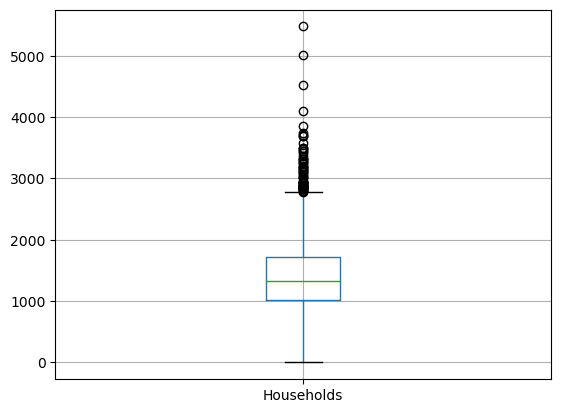

In [55]:
income2.boxplot(column=['Households'])

In [ ]:
## I'm going to try to map it now

In [57]:
import geopandas as gpd

In [58]:
tracts=gpd.read_file('Week 3/Census_Tracts_2020.geojson')
tracts.head()

,OBJECTID,CT20,LABEL,ShapeSTArea,ShapeSTLength,geometry
0,1,101110,1011.10,1.229562e+07,15083.854287,"POLYGON ((-118.28491 34.25948, -118.28492 34.2..."
1,2,101122,1011.22,2.845774e+07,31671.455844,"POLYGON ((-118.29015 34.27417, -118.29015 34.2..."
2,3,101220,1012.20,7.522093e+06,12698.783810,"POLYGON ((-118.28100 34.25592, -118.28198 34.2..."
3,4,101221,1012.21,3.812000e+06,9161.710543,"POLYGON ((-118.28735 34.25591, -118.28863 34.2..."
4,5,101222,1012.22,3.191371e+06,9980.600461,"POLYGON ((-118.28594 34.25405, -118.28594 34.2..."


<AxesSubplot: >

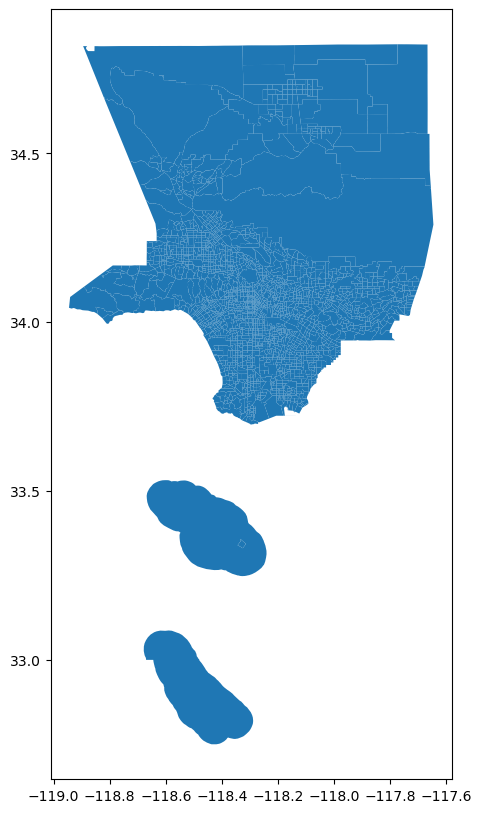

In [59]:
tracts.plot(figsize=(12,10))

In [60]:
tracts = tracts[['CT20', 'geometry']]
tracts.head()

,CT20,geometry
0,101110,"POLYGON ((-118.28491 34.25948, -118.28492 34.2..."
1,101122,"POLYGON ((-118.29015 34.27417, -118.29015 34.2..."
2,101220,"POLYGON ((-118.28100 34.25592, -118.28198 34.2..."
3,101221,"POLYGON ((-118.28735 34.25591, -118.28863 34.2..."
4,101222,"POLYGON ((-118.28594 34.25405, -118.28594 34.2..."


## Merging Data

In [63]:
tracts['FIPS'] = '06' + '037' + tracts['CT20']

In [64]:
tracts.head()

,CT20,geometry,FIPS
0,101110,"POLYGON ((-118.28491 34.25948, -118.28492 34.2...",06037101110
1,101122,"POLYGON ((-118.29015 34.27417, -118.29015 34.2...",06037101122
2,101220,"POLYGON ((-118.28100 34.25592, -118.28198 34.2...",06037101220
3,101221,"POLYGON ((-118.28735 34.25591, -118.28863 34.2...",06037101221
4,101222,"POLYGON ((-118.28594 34.25405, -118.28594 34.2...",06037101222


In [65]:
tracts_income=tracts.merge(income2,on="FIPS")

In [66]:
tracts_income.head()

,CT20,geometry,FIPS,Households,"Less than $10,000","$10,000 to $14,999","$15,000 to $19,999","$20,000 to $24,999","$25,000 to $29,999","$30,000 to $34,999","$35,000 to $39,999","$40,000 to $44,999","$45,000 to $49,999","$50,000 to $59,999","$60,000 to $74,999","$75,000 to $99,999","$100,000 to $124,999","$125,000 to $149,999","$150,000 to $199,999","$200,000 or More"
0,101110,"POLYGON ((-118.28491 34.25948, -118.28492 34.2...",06037101110,1596,110,97,70,76,123,96,54,78,88,64,126,277,91,93,109,44
1,101122,"POLYGON ((-118.29015 34.27417, -118.29015 34.2...",06037101122,1256,52,18,0,15,39,38,7,40,23,62,186,232,114,105,133,192
2,101220,"POLYGON ((-118.28100 34.25592, -118.28198 34.2...",06037101220,1294,65,104,160,56,22,133,60,118,123,53,75,88,110,45,43,39
3,101300,"POLYGON ((-118.26530 34.25735, -118.26530 34.2...",06037101300,1435,75,14,69,36,29,23,18,123,49,87,80,200,146,107,195,184
4,101400,"POLYGON ((-118.29657 34.25356, -118.29694 34.2...",06037101400,1473,20,82,68,146,86,47,14,47,27,88,134,156,166,136,179,77


<AxesSubplot: >

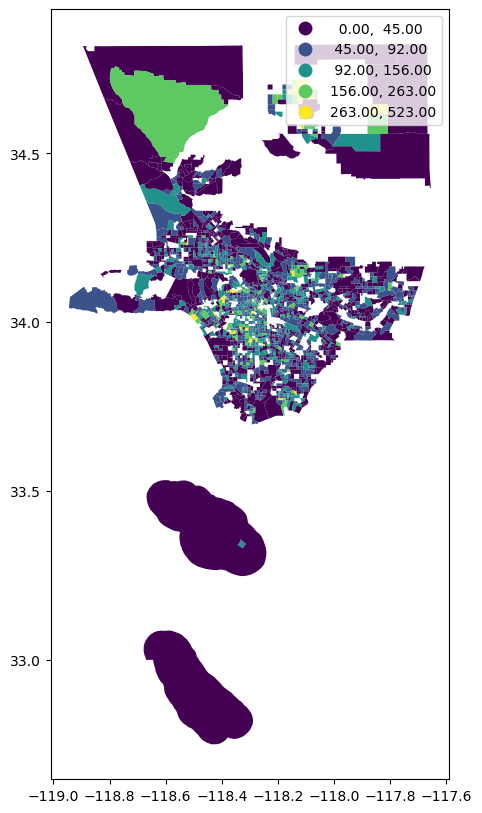

In [68]:
tracts_income.plot(figsize=(12,10), 
                  column= 'Less than $10,000',
                  legend = True,
                  scheme='NaturalBreaks')

<AxesSubplot: >

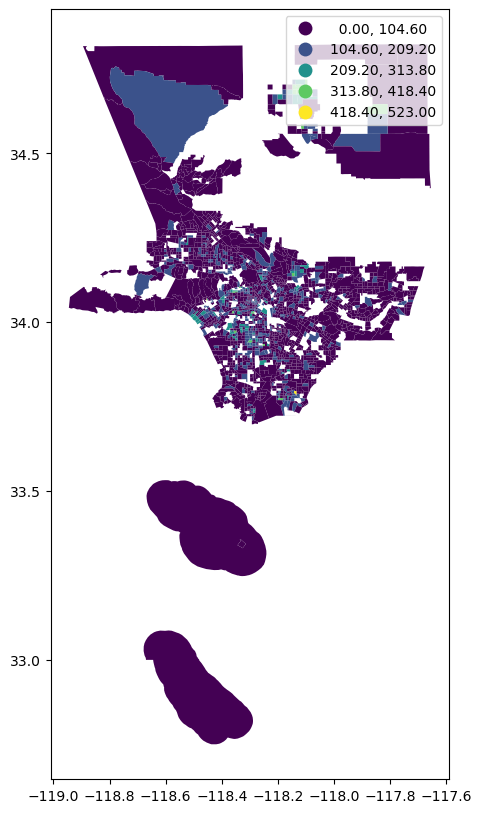

In [69]:
tracts_income.plot(figsize=(12,10), 
                  column= 'Less than $10,000',
                  legend = True,
                  scheme='equal_interval')

<AxesSubplot: >

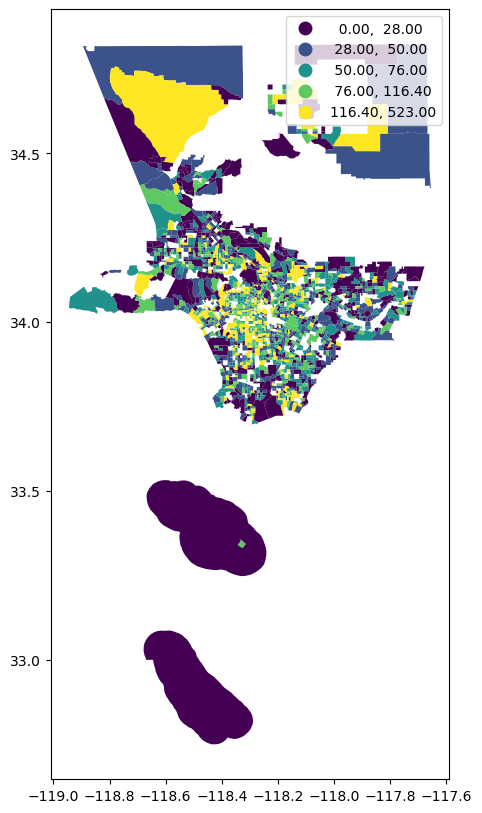

In [70]:
tracts_income.plot(figsize=(12,10), 
                  column= 'Less than $10,000',
                  legend = True,
                  scheme='quantiles')

In [74]:
tracts_income['PCT_Less10000'] =tracts_income['Less than $10,000']/tracts_income['Households']*100

<AxesSubplot: >

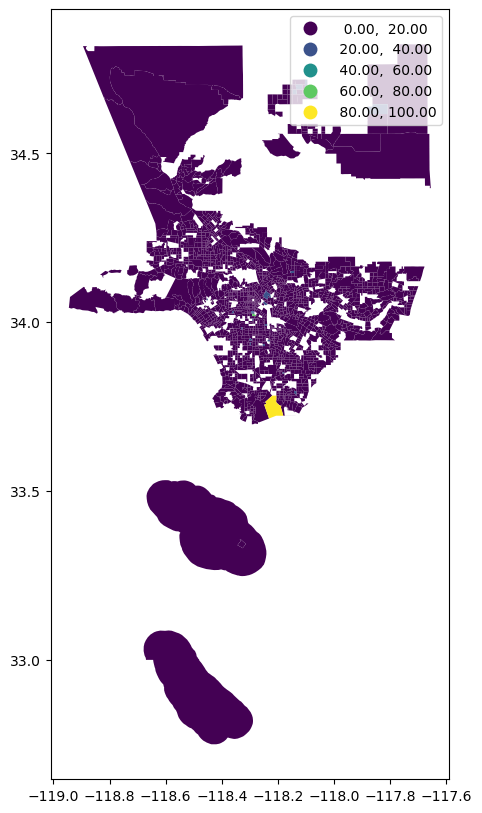

In [78]:
tracts_income.plot(figsize=(12,10),
                 column='PCT_Less10000',
                 legend=True, 
                 scheme='equal_interval')

In [ ]:
#clip only for neighborhoods chinatown, lincoln heights, elysian park, and echo park (Clara assisted me with this section)

In [81]:
neighborhoods = gpd.read_file('Week 3/LATBoundaries.geojson')

<AxesSubplot: >

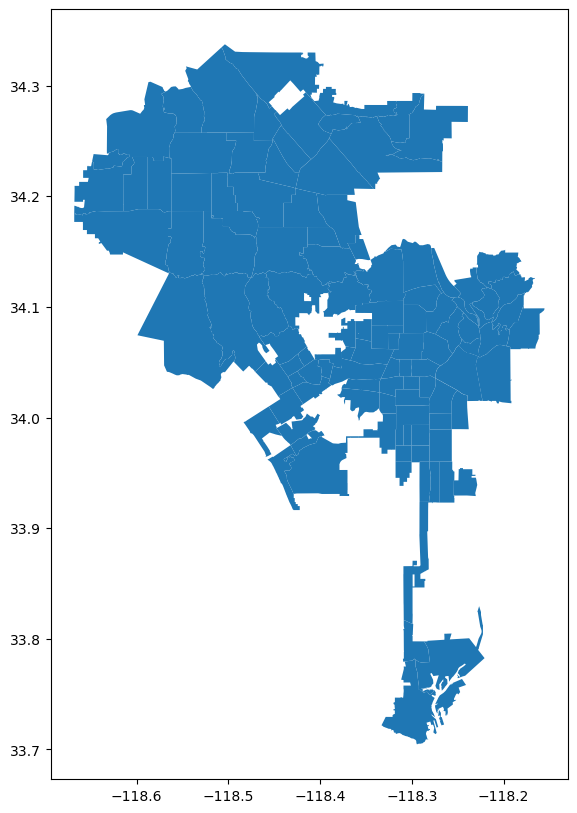

In [82]:
neighborhoods.plot(figsize=(12,10))

In [90]:
neighborhoods.head()

,OBJECTID,name,geometry
0,1,Adams-Normandie,"POLYGON ((-118.30069 34.03731, -118.30388 34.0..."
1,2,Arleta,"POLYGON ((-118.44255 34.26412, -118.44240 34.2..."
2,3,Arlington Heights,"POLYGON ((-118.31862 34.05306, -118.31673 34.0..."
3,4,Atwater Village,"MULTIPOLYGON (((-118.27886 34.15321, -118.2788..."
4,5,Baldwin Hills/Crenshaw,"POLYGON ((-118.36102 34.02532, -118.36026 34.0..."


In [91]:
relevant_neighborhoods = set(('Echo Park','Lincoln Heights','Chinatown','Elysian Park'))
clipped_neighborhoods = neighborhoods.loc[neighborhoods['name'].isin(relevant_neighborhoods)] 
clipped_neighborhoods.head()

,OBJECTID,name,geometry
20,21,Chinatown,"POLYGON ((-118.22473 34.06758, -118.22703 34.0..."
26,27,Echo Park,"POLYGON ((-118.24487 34.09569, -118.24454 34.0..."
28,29,Elysian Park,"POLYGON ((-118.24246 34.09391, -118.24057 34.0..."
56,57,Lincoln Heights,"POLYGON ((-118.21218 34.08389, -118.21194 34.0..."


In [92]:

tracts_income_clipped = gpd.clip(tracts_income, clipped_neighborhoods)

/opt/conda/lib/python3.10/site-packages/geopandas/tools/clip.py:67: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  clipped.loc[


<AxesSubplot: >

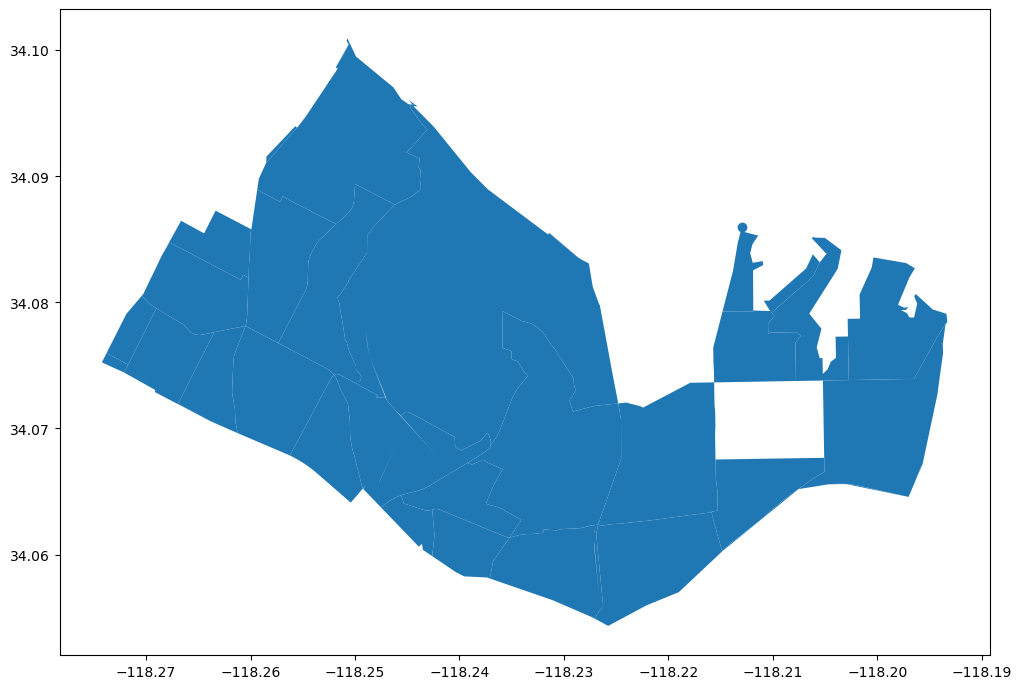

In [93]:

tracts_income_clipped.plot(figsize=(12,10))

In [ ]:
### Note: I'm not sure why the map did not clip everything I wanted

In [71]:
import folium

<AxesSubplot: >

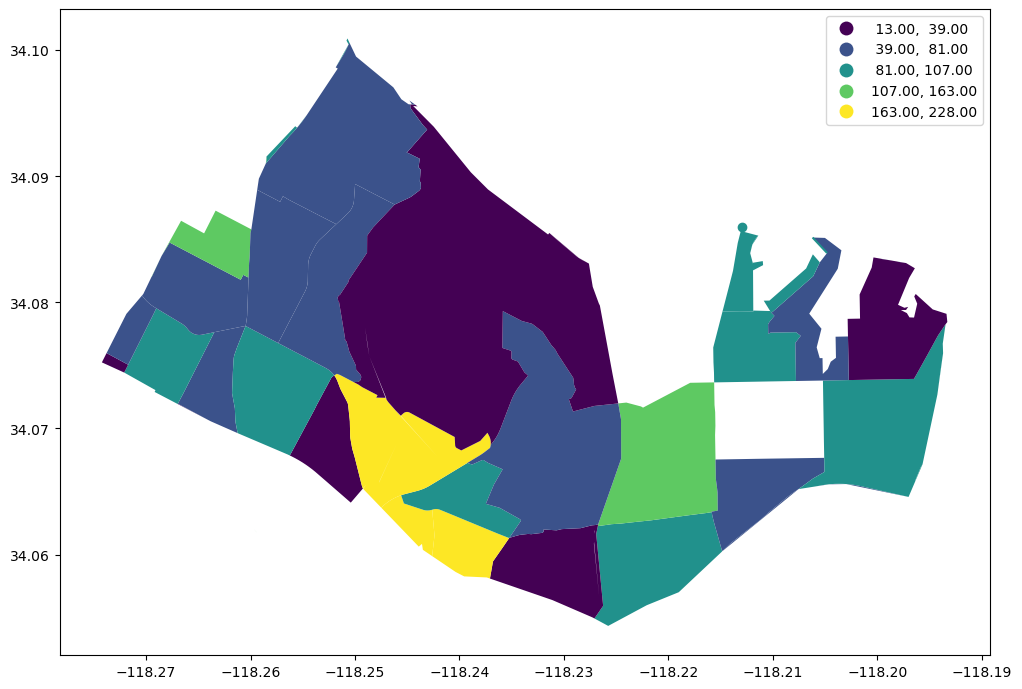

In [94]:
tracts_income_clipped.plot(figsize=(12,10),
                 column='Less than $10,000',
                 legend=True, 
                 scheme='NaturalBreaks')